# MNIST (k-Nearest Neighbors)

This notebook includes code from Chapter 3 of *Hands-On Machine Learning*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, cross_validate,
                                     GridSearchCV)
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, PrecisionRecallDisplay)

# Make this notebook's output stable across runs
np.random.seed(1)

# For plotting nice figures
%matplotlib inline
sns.set()
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Load MNIST Data

In [2]:
# Load data
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True,
                             as_frame=False)
X.shape

(70000, 784)

In [3]:
# Take random subset of data for quicker processing
sample = np.random.choice(X.shape[0], 5000)
X = X[sample]
y = y[sample]

X.shape

(5000, 784)

In [4]:
# The image resolution is 28x28

# The image is black and white,
# so each pixel has a single "color" value

# Therefore, there are 784 features

28*28

784

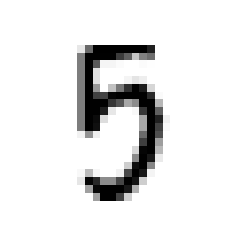

In [5]:
# Let's look at the third digit in the X data
some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[2]

'5'

In [7]:
with np.printoptions(threshold=np.inf, edgeitems=10, linewidth=1000,
                     formatter=dict(float=lambda x: "%3.0f" % x)):
    print(X[2].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  24 149 255 254 255 254 254 254 254 223   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 253 253 253 253 196 160  58 126 145   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 253 166  10  10   4   0   0   4   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 130 253  31   0   0   0   0   0   0   0   

In [8]:
X.shape

(5000, 784)

In [9]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Binary Classification

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_train_5[1:20]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False])

In [12]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 1
knn_clf = KNeighborsClassifier(n_neighbors=1)
cv_results = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                            scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {cv_results["test_accuracy"].mean():.4f}\n'
       f'Precision: {cv_results["test_precision"].mean():.4f}\n'
       f'Recall: {cv_results["test_recall"].mean():.4f}'))

Accuracy: 0.9865
Precision: 0.9305
Recall: 0.9140


In [13]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 10
knn_clf = KNeighborsClassifier(n_neighbors=10)
cv_results = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                            scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {cv_results["test_accuracy"].mean():.4f}\n'
       f'Precision: {cv_results["test_precision"].mean():.4f}\n'
       f'Recall: {cv_results["test_recall"].mean():.4f}'))

Accuracy: 0.9845
Precision: 0.9704
Recall: 0.8480


## Hyperparameter Grid Search

In [14]:
parameters = {
    'n_neighbors':range(1, 51)
}

knn_clf = KNeighborsClassifier()
grid = GridSearchCV(knn_clf, param_grid=parameters,
                    scoring='accuracy')
grid.fit(X_train, y_train_5)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')

In [15]:
print(f'Accuracy: {grid.best_score_:.3f}')
grid.best_params_

Accuracy: 0.988


{'n_neighbors': 5}

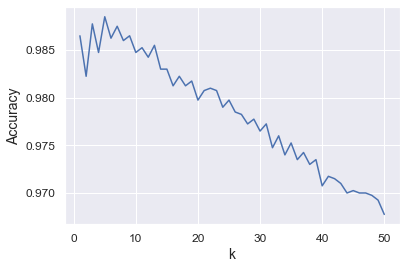

In [16]:
plt.plot(parameters['n_neighbors'],
         grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

## Precision-Recall Trade-Off

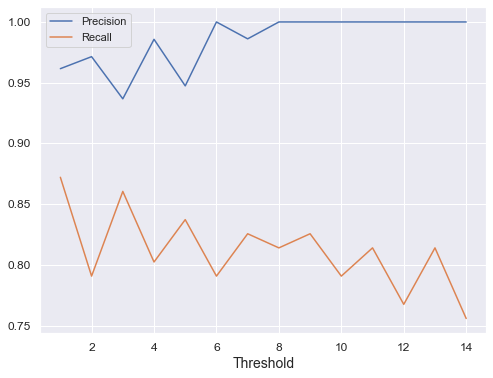

In [17]:
# Manually create a precision-recall plot
ks = range(1, 15)
precisions = []
recalls = []

for k in ks:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train_5)
    y_pred_5 = knn_clf.predict(X_test)
    precisions += [precision_score(y_test_5, y_pred_5)]
    recalls += [recall_score(y_test_5, y_pred_5)]

plt.subplots(figsize=(8, 6))
plt.plot(ks, precisions)
plt.plot(ks, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

## Precision-Recall Trade-Off for Fixed k

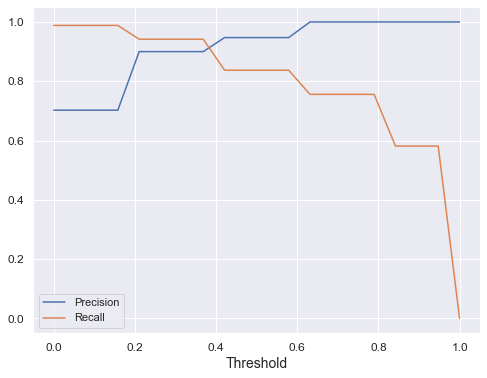

In [18]:
# Use optimized value of k
k_best = grid.best_params_['n_neighbors']

knn_clf = KNeighborsClassifier(n_neighbors=k_best)
knn_clf.fit(X_train, y_train_5)

# Manually create a precision-recall plot for the test data
y_score = knn_clf.predict_proba(X_test)[:, 1]

# Range of thresholds for assigning an instance to the positive class (5)
thresholds = np.linspace(0.0, 1.0, num=20)

precisions = []
recalls = []
for t in thresholds:
    y_pred = (y_score > t)
    precisions += [precision_score(y_test_5, y_pred,
                                   zero_division=1)]
    recalls += [recall_score(y_test_5, y_pred)]

plt.subplots(figsize=(8, 6))
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

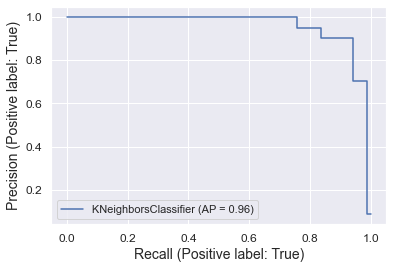

In [19]:
# Use sklearn to create a precision-recall plot
PrecisionRecallDisplay.from_estimator(knn_clf, X_test, y_test_5)
plt.show()

### Exercise

Create a line plot with as the recall values on the horizontal axis and the precision values on the vertical axis. How does this plot compare to the precision-recall plot from sklearn?

## Multiclass Classification

In [20]:
# Fit k-Nearest Neighbors model for the multiclass problem with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.93

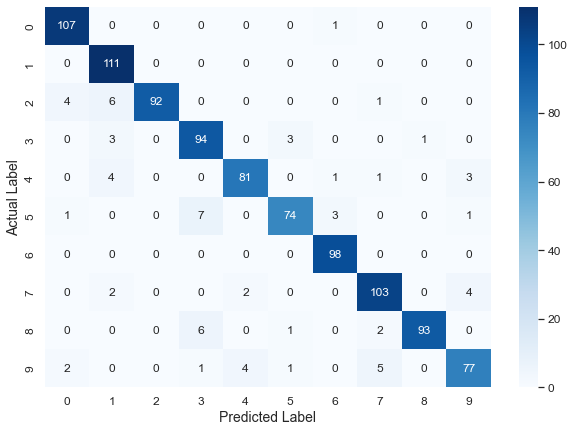

In [22]:
# Visualize performance with a confusion matrix
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (10, 7))
sns.heatmap(dfcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Exercise

Why wouldn't the following line of code work?

`precision_score(y_test, y_pred)`